In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data = pd.read_csv('3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [ ]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [ ]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
identified_clusers = kmeans.fit_predict(x)
identified_clusers

array([1, 1, 0, 0, 0, 2], dtype=int32)

In [ ]:
data_clusters = data
data_clusters['Clusters'] = identified_clusers
data_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


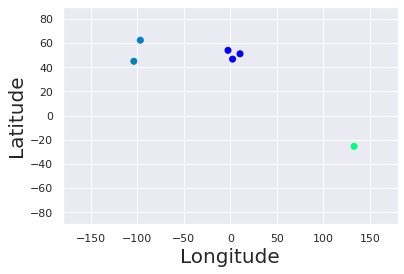

In [ ]:
x = data_clusters['Longitude']
y = data_clusters['Latitude']

plt.scatter(x, y, c=data_clusters['Clusters'], cmap='winter')
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

**BATAS SUCI**

In [ ]:
countries_data = pd.read_csv('Countries-exercise.csv')
x = countries_data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


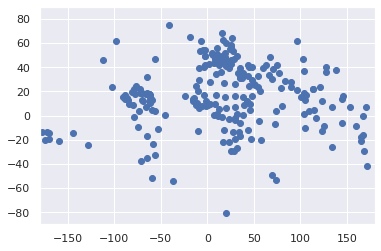

In [ ]:
plt.scatter(countries_data['Longitude'], countries_data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [ ]:
kmeans = KMeans(7)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 1, 4, 0, 3, 3, 3, 1, 0, 1, 6, 4, 2, 4, 0, 2, 3, 1, 4, 3, 5, 5,
       1, 3, 1, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 1, 4, 5, 3, 0, 1, 5, 5,
       4, 5, 6, 0, 4, 5, 0, 0, 0, 0, 3, 3, 3, 3, 4, 0, 3, 0, 5, 0, 3, 4,
       3, 3, 4, 3, 2, 0, 3, 3, 2, 5, 3, 1, 3, 5, 5, 5, 5, 5, 3, 0, 3, 0,
       2, 0, 2, 4, 0, 3, 0, 3, 2, 3, 1, 2, 4, 3, 1, 1, 3, 3, 3, 0, 3, 3,
       2, 1, 1, 4, 1, 2, 0, 0, 2, 3, 1, 2, 3, 5, 3, 0, 3, 1, 4, 3, 3, 3,
       2, 0, 5, 3, 3, 4, 1, 0, 2, 3, 5, 3, 1, 3, 1, 2, 4, 5, 0, 4, 4, 2,
       4, 2, 5, 2, 5, 0, 6, 3, 3, 1, 2, 2, 1, 1, 0, 6, 0, 2, 2, 2, 3, 0,
       2, 3, 0, 3, 6, 1, 3, 1, 4, 5, 1, 5, 4, 5, 2, 0, 5, 2, 5, 0, 3, 4,
       4, 0, 3, 5, 0, 3, 3, 3, 4, 0, 4, 3, 0, 5, 5, 2, 1, 1, 2, 6, 0, 3,
       3, 2, 4, 4, 3, 0, 0, 1, 3, 0, 0, 0, 0, 2, 2, 6, 6, 1, 4, 4, 4],
      dtype=int32)

In [ ]:
geo_cluster = countries_data
geo_cluster['Clusters'] = identified_clusters
geo_cluster

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,4
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,6
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,4
239,Zambia,27.774759,-13.458242,4


In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [ ]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256573.08675934302,
 192356.48001889366,
 151755.50258938828,
 126758.35414179866,
 102913.61962302422,
 84967.41720068289,
 76571.81780508837]

Text(0, 0.5, 'Within-cluster Sum of Squares')

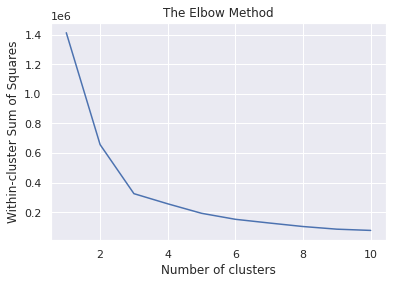

In [ ]:
number_clusters = range(1,11)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

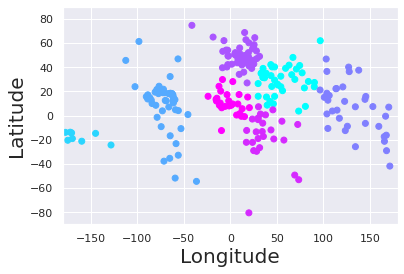

In [ ]:
x = geo_cluster['Longitude']
y = geo_cluster['Latitude']

plt.scatter(x, y, c=geo_cluster['Clusters'], cmap='cool')
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

**BATAS SUCI**

In [ ]:
categories = pd.read_csv('Categorical.csv')
categories['continent'] = categories['continent'].map({'North America': 0, 'Asia': 1, 'Africa': 2, 'Europe': 3, 'South America': 4, 'Oceania': 5, 'Antarctica': 6, 'Seven seas (open ocean)': 7})
x = categories.iloc[:,3:4]
x.head()

,continent
0,0
1,1
2,2
3,0
4,3


In [ ]:
categories['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [ ]:
categories.shape

(241, 5)

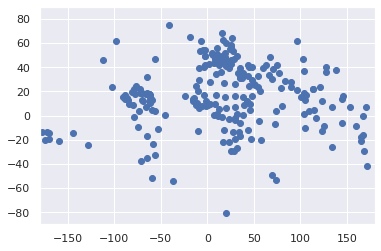

In [ ]:
plt.scatter(categories['Longitude'], categories['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [ ]:
kmeans = KMeans(7)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 5, 4, 1, 0, 0, 0, 5, 6, 5, 3, 2, 3, 2, 1, 3, 0, 5, 4, 0, 4, 4,
       5, 0, 5, 1, 1, 0, 1, 0, 1, 1, 6, 6, 1, 5, 5, 4, 4, 0, 6, 5, 4, 4,
       4, 4, 3, 6, 4, 4, 1, 1, 1, 1, 5, 5, 0, 0, 4, 1, 0, 1, 4, 6, 4, 4,
       0, 0, 4, 0, 3, 6, 0, 0, 3, 4, 0, 5, 0, 4, 4, 4, 4, 4, 0, 1, 1, 1,
       3, 6, 5, 2, 1, 0, 1, 0, 5, 0, 5, 5, 2, 0, 5, 5, 0, 5, 0, 1, 0, 5,
       5, 5, 5, 4, 5, 5, 3, 1, 5, 0, 5, 5, 5, 4, 4, 1, 0, 5, 4, 0, 0, 0,
       5, 1, 4, 0, 0, 4, 2, 1, 3, 0, 4, 0, 5, 0, 5, 3, 4, 4, 1, 2, 4, 5,
       4, 3, 4, 3, 4, 1, 3, 0, 0, 5, 3, 3, 5, 5, 1, 3, 6, 5, 3, 3, 0, 1,
       5, 0, 6, 5, 3, 5, 0, 0, 4, 4, 5, 4, 4, 4, 5, 2, 2, 3, 4, 1, 0, 4,
       4, 1, 0, 4, 6, 0, 0, 0, 4, 1, 2, 5, 1, 4, 4, 5, 5, 5, 5, 3, 1, 4,
       5, 5, 4, 4, 0, 6, 1, 5, 0, 1, 6, 1, 1, 5, 3, 3, 3, 5, 4, 4, 4],
      dtype=int32)

In [ ]:
continent = categories
continent['Clusters'] = identified_clusters
continent.head()

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,0,1
1,Afghanistan,66.004734,33.835231,1,5
2,Angola,17.537368,-12.293361,2,4
3,Anguilla,-63.064989,18.223959,0,1
4,Albania,20.049834,41.142450,3,0


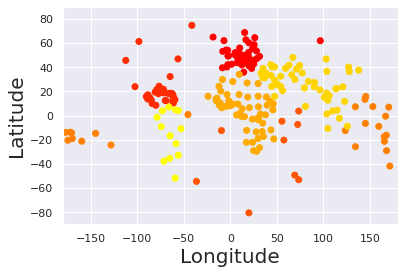

In [ ]:
plt.scatter(categories['Longitude'], categories['Latitude'], c=continent['Clusters'], cmap='autumn')
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [ ]:
wcss = []

for i in range(1,9):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [ ]:
wcss

[722.5311203319502,
 240.2344827586207,
 93.74558050645007,
 56.69175269175269,
 31.453189453189452,
 9.32132132132132,
 0.8888888888888888,
 6.633210877260742e-29]

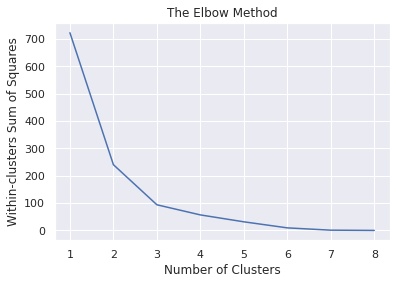

In [ ]:
number_clusters = range(1,9)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-clusters Sum of Squares')
plt.show()

**BATAS SUCI**

In [ ]:
data = pd.read_csv('3.12. Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


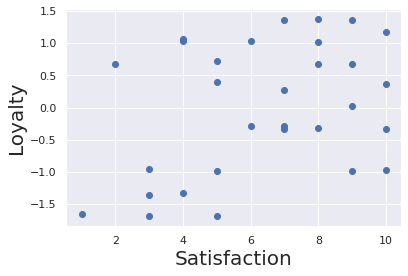

In [ ]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction', fontsize=20)
plt.ylabel('Loyalty', fontsize=20)
plt.show()

In [ ]:
x = data
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
data = x
data['Clusters'] = kmeans.fit_predict(x)
data.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0


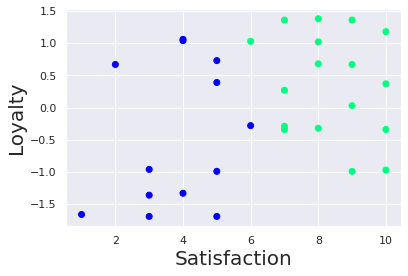

In [ ]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c=data['Clusters'], cmap='winter')
plt.xlabel('Satisfaction', fontsize=20)
plt.ylabel('Loyalty', fontsize=20)
plt.show()

In [ ]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(x)
x_scaled[:5]

array([[-0.93138063, -1.3318111 , -1.14354375],
       [-0.15523011, -0.28117124, -1.14354375],
       [-0.54330537, -0.99160391, -1.14354375],
       [ 0.23284516, -0.29117733,  0.87447463],
       [-0.93138063,  1.05964534, -1.14354375]])

In [ ]:
wcss = []

for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [ ]:
wcss

[90.0,
 32.43692292542638,
 19.299263412475238,
 11.202729464272982,
 9.256383749170235,
 7.690090955371798,
 6.340339913898956,
 5.106907367966774,
 4.464132115032714]

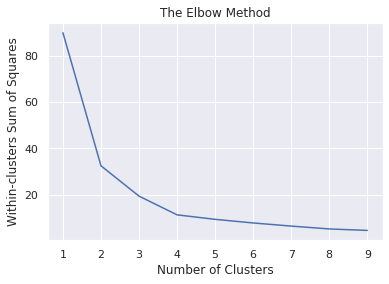

In [ ]:
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-clusters Sum of Squares')
plt.show()

In [ ]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new.head()

,Satisfaction,Loyalty,Clusters,cluster_pred
0,4,-1.33,0,0
1,6,-0.28,0,2
2,5,-0.99,0,0
3,7,-0.29,1,1
4,4,1.06,0,2


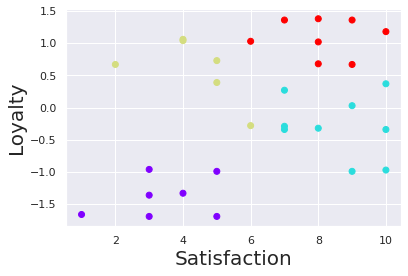

In [ ]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction', fontsize=20)
plt.ylabel('Loyalty', fontsize=20)
plt.show()

**BATAS SUCI**

In [ ]:
iris = pd.read_csv('iris-dataset.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


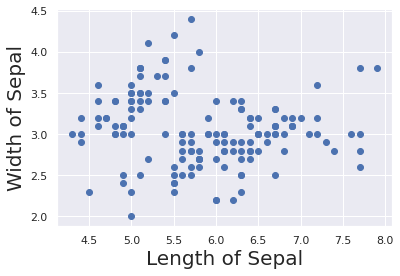

In [ ]:
plt.scatter(iris['sepal_length'], iris['sepal_width'])
plt.xlabel('Length of Sepal', fontsize=20)
plt.ylabel('Width of Sepal', fontsize=20)
plt.show()

In [ ]:
x = iris.iloc[:,:2]


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(x)
x_scaled[:5]

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019]])

In [ ]:
wcss = []

for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [ ]:
wcss

[300.0,
 168.39262198361087,
 103.78443895265738,
 79.76763093668842,
 61.70659834761936,
 52.85965140699233,
 44.58654483942183,
 37.66113470257946,
 30.613862314442432]

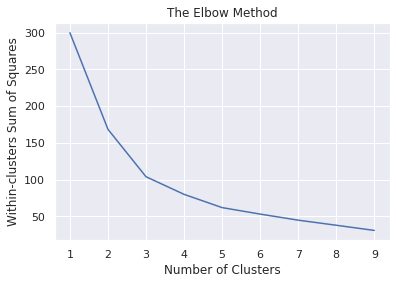

In [ ]:
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-clusters Sum of Squares')
plt.show()

In [ ]:
kmeans = KMeans(3)
kmeans.fit(x_scaled)
clusters = x
clusters['cluster_pred'] = kmeans.fit_predict(x_scaled)
clusters.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sepal_length,sepal_width,cluster_pred
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


[]

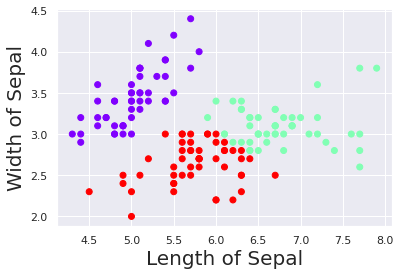

In [ ]:
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Length of Sepal', fontsize=20)
plt.ylabel('Width of Sepal', fontsize=20)
plt.plot()

**BATAS SUCI**

In [ ]:
countries_standard = pd.read_csv('Country clusters standardized.csv', index_col='Country')
countries_standard = countries_standard.drop(['Language'], axis=1)
countries_standard.head()

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360


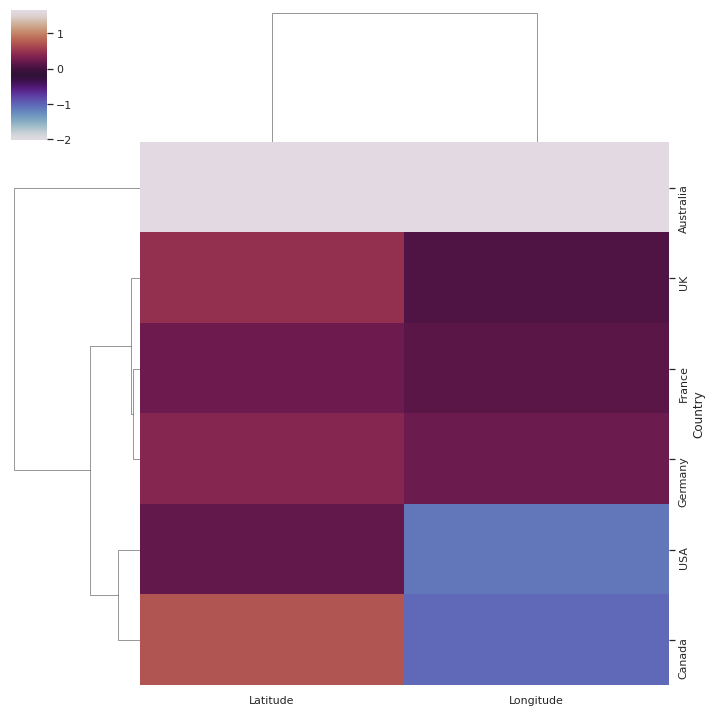

In [ ]:
sns.clustermap(countries_standard, cmap='twilight')